In [1]:
import mushi

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import msprime
import tskit
from itertools import tee

from glob import glob

In [231]:
t = np.logspace(np.log10(1), np.log10(1000000), 100)
mu = 3e-8
bps = 10000
c = 1.6e-8

sfs_files = glob("../data/angsd_pi/v5--Teo--random1*.sfs")
sfs_list = []

for sfs_file in sfs_files:
    with open(sfs_file) as f:
        sfs = f.readlines()[0].split()
        sfs_chr = np.array([float(s) for s in sfs])
        sfs_list.append(sfs_chr)

sfs_array = np.asarray(sfs_list)
sfs_all = sfs_array.sum(axis=0)
print(sfs_all)

[4.26842830e+08 8.44963068e+06 4.18664091e+06 2.17393710e+06
 1.27240398e+06 8.21830933e+05 5.75642557e+05 4.29737786e+05
 3.61886515e+05 2.66786633e+05 2.38767150e+05 1.91556458e+05
 1.69395800e+05 1.65859271e+05 1.48677274e+05 1.57244571e+05
 1.47637848e+05 1.48075018e+05 1.51510235e+05 1.62834966e+05
 3.03086313e+05]


inferring η(t)
initial objective -2.783152e+08
iteration 1945, objective -2.806e+08, relative change 7.785e-13                                                                                                                       
relative change in objective function 7.8e-13 is within tolerance 1e-12 after 1945 iterations


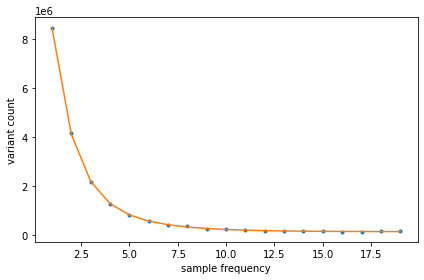

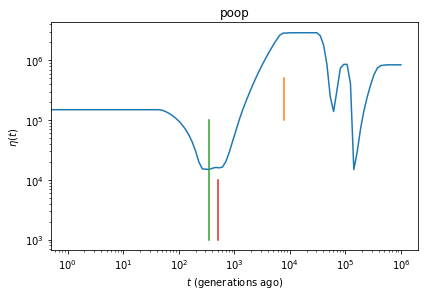

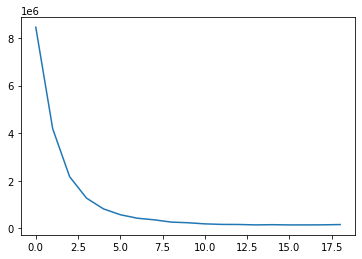

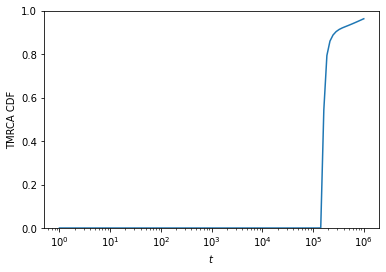

In [232]:
ksfs = mushi.kSFS(np.array(sfs_all[1:-1]))
ksfs.infer_history(t, mu0 = mu*sum(sfs_all), infer_mu=False, folded = False,
                   alpha_tv=5e1, alpha_spline=5e1, alpha_ridge = 1e-3,
                   tol=1e-12, verbose=True, max_iter = 5000)

ksfs.plot_total()
plt.show()
plt.xscale('log')
plt.yscale('log')
ksfs.eta.plot()
plt.title("poop")
plt.plot((8000, 8000), (100000, 500000))
plt.plot((350, 350), (1000, 100000))
plt.plot((500, 500), (1000, 10000))
plt.show()
plt.plot(sfs_all[1:-1])
plt.show()

plt.plot(t, ksfs.tmrca_cdf(ksfs.eta))
plt.xlabel('$t$')
plt.ylabel('TMRCA CDF')
plt.ylim([0, 1])
plt.xscale('log')
plt.show()

In [233]:
Nt = ksfs.eta.vals
T = ksfs.eta.change_points

N_0 = Nt[0] / 2
msp_N = Nt[1:] / 2
msp_T = T
nsamp = len(sfs_all)-1

#ms_N = Nt[1:]/N_0
#ms_T = T/(4*N_0)


population_configurations = [msprime.PopulationConfiguration(sample_size = nsamp, initial_size = N_0)]
demography_list = [msprime.PopulationParametersChange(time = t, initial_size = n) for t, n, in zip(msp_T, msp_N)]

ts_mushi = msprime.simulate(
    population_configurations=population_configurations, 
    demographic_events = demography_list, 
    #Ne = N_0, sample_size = nsamp,
    length = bps, 
    recombination_rate = c, 
    mutation_rate = mu, 
    num_replicates = 1000
)

ts_mushi, ts_mushi_copy = tee(ts_mushi)


#pi = [ts.diversity() for ts in ts_mushi]
#td = [ts.Tajimas_D() for ts in ts_mushi]

print(np.nanmean(list(map(lambda a : [a.diversity().item(), a.Tajimas_D().item()], ts_mushi)), axis=0))
#list(map(lambda a : [a.diversity().item(), a.Tajimas_D().item()], ts_mushi))


[ 0.00990955 -0.9582774 ]


In [234]:
msp_N/N_0

DeviceArray([ 1.        ,  1.        ,  1.        ,  1.        ,
              1.        ,  1.        ,  1.        ,  1.        ,
              1.        ,  1.        ,  1.        ,  1.        ,
              1.        ,  1.        ,  1.        ,  1.        ,
              1.        ,  1.        ,  1.        ,  1.        ,
              1.        ,  1.        ,  1.        ,  1.        ,
              1.        ,  1.        ,  1.        ,  0.99993942,
              0.97975639,  0.934942  ,  0.87407145,  0.80420239,
              0.72776602,  0.6456107 ,  0.55864256,  0.46828632,
              0.37667236,  0.28677825,  0.20267746,  0.13165654,
              0.10217006,  0.10097336,  0.1003175 ,  0.10468921,
              0.10817613,  0.10623935,  0.10976856,  0.13631359,
              0.19390667,  0.29738809,  0.45136557,  0.68893558,
              1.00057952,  1.39836125,  1.92890246,  2.6216056 ,
              3.50110641,  4.59440119,  5.93872865,  7.57705348,
              9.55241203,

In [235]:
2231 / 55000

0.040563636363636364